In [1]:
#This project aims to Analyze Customer review over Amazon products- classifying them into postive, negative or neutral

In [ ]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt, seaborn as sb

In [ ]:
df=pd.read_csv("C:/Users/Anya gupta/Desktop/Data_set/Product_review_dataset.csv")
df

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
df=df.drop(columns=['discounted_price','actual_price','discount_percentage','img_link','product_link','user_id'],errors='ignore')

In [ ]:
df.head(3)

In [ ]:
df.columns

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
stop_words=set(stopwords.words('english'))
lemm=WordNetLemmatizer()

In [ ]:
def clean_data(data):
    data=re.sub(r"[^a-zA-Z\s]","",data) 
    data=data.lower()
    words=word_tokenize(data)
    words=[word for word in words if word not in stop_words]
    lemm_words=[lemm.lemmatize(word) for word in words]
    return " ".join(lemm_words)

cleaned_data=[clean_data(data) for data in df['review_content']] 


In [ ]:
from tqdm import tqdm
from textblob import TextBlob
# Initialize a list to store results
results = []
positive_count=0
negative_count=0
neutral_count=0
# Process each review
for review in tqdm(df['review_content'], desc="Processing Reviews"):
    # Tokenize the review into sentences
    sentences = sent_tokenize(review)
    
    # Initialize sentiment counters
    sentiment_scores = {"positive": 0, "negative": 0, "neutral": 0}
    
    # Analyze each sentence
    for sentence in sentences:
        analysis = TextBlob(sentence)
        if analysis.sentiment.polarity > 0:
            sentiment_scores["positive"] +=1
            positive_count+=1
        elif analysis.sentiment.polarity < 0:
            sentiment_scores["negative"] +=1 
            negative_count+=1
        else:
            sentiment_scores["neutral"] +=1
            neutral_count+=1
    
    # Determine overall sentiment
    if sentiment_scores["positive"] > sentiment_scores["negative"]:
        overall_sentiment = "positive"
    elif sentiment_scores["negative"] > sentiment_scores["positive"]:
        overall_sentiment = "negative"
    else:
        overall_sentiment = "neutral"
    
    # Append result to the list
    results.append({
        "review": review,
        "positive_sentences": sentiment_scores["positive"],
        "negative_sentences": sentiment_scores["negative"],
        "neutral_sentences": sentiment_scores["neutral"],
        "overall_sentiment": overall_sentiment
    })

results_df = pd.DataFrame(results)
print(results_df)
print(f"Number of positive reviews:{positive_count}")
print(f"Number of negative reviews:{negative_count}")
print(f"Number of neutral reviews:{neutral_count}")


In [ ]:
df

In [25]:
results_df

,review,positive_sentences,negative_sentences,neutral_sentences,overall_sentiment
0,Looks durable Charging is fine tooNo complains...,2,0,0,positive
1,I ordered this cable to connect my phone to An...,4,0,2,positive
2,"Not quite durable and sturdy,https://m.media-a...",1,0,0,positive
3,"Good product,long wire,Charges good,Nice,I bou...",1,0,0,positive
4,"Bought this instead of original apple, does th...",3,0,0,positive
...,...,...,...,...,...
1460,"I received product without spanner,Excellent p...",2,0,0,positive
1461,"ok,got everything as mentioned but the measuri...",5,3,6,positive
1462,"plastic but cool body ,u have to find sturdy s...",4,0,0,positive
1463,I have installed this in my kitchen working fi...,0,1,0,negative


In [26]:
final_df=pd.concat([df,results_df],axis=1)

In [27]:
final_df

,product_id,product_name,category,rating,rating_count,about_product,user_name,review_id,review_title,review_content,review,positive_sentences,negative_sentences,neutral_sentences,overall_sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Looks durable Charging is fine tooNo complains...,2,0,0,positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"43,994","Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,I ordered this cable to connect my phone to An...,4,0,2,positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","Not quite durable and sturdy,https://m.media-a...",1,0,0,positive
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","Good product,long wire,Charges good,Nice,I bou...",1,0,0,positive
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","Bought this instead of original apple, does th...",3,0,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...","I received product without spanner,Excellent p...",2,0,0,positive
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,"4,118","230 Volts, 400 watts, 1 Year","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...","ok,got everything as mentioned but the measuri...",5,3,6,positive
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,468,International design and styling|Two heat sett...,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...","plastic but cool body ,u have to find sturdy s...",4,0,0,positive
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4,"8,031",Fan sweep area: 230 MM ; No

In [28]:
final_df=final_df.drop(columns=['review_content'])

In [29]:
final_df.head(4)

,product_id,product_name,category,rating,rating_count,about_product,user_name,review_id,review_title,review,positive_sentences,negative_sentences,neutral_sentences,overall_sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,2,0,0,positive
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,"43,994","Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,4,0,2,positive
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",1,0,0,positive
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",1,0,0,positive


C:\Users\Anya gupta\AppData\Local\Temp\ipykernel_13960\2644615939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=['Positive', 'Negative', 'Neutral'], y=[total_positive, total_negative, total_neutral], palette='coolwarm')


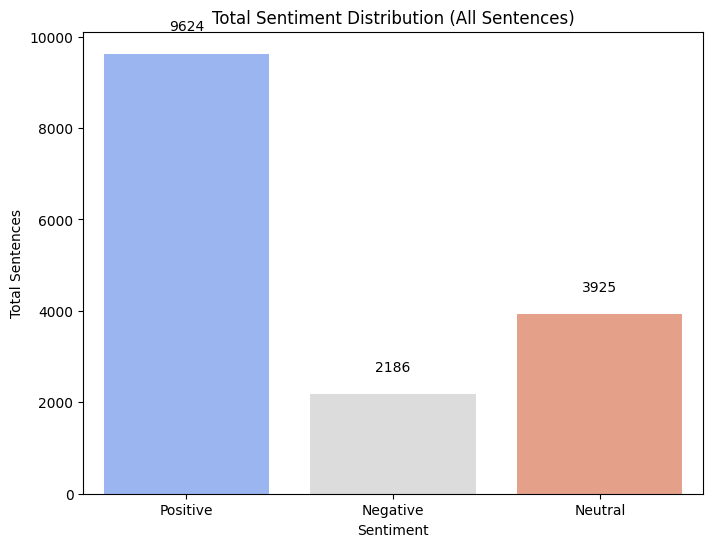

In [30]:
# Summing up total sentences across the dataset
total_positive = final_df['positive_sentences'].sum()
total_negative = final_df['negative_sentences'].sum()
total_neutral = final_df['neutral_sentences'].sum()

# Visualize the totals
plt.figure(figsize=(8, 6))
sb.barplot(x=['Positive', 'Negative', 'Neutral'], y=[total_positive, total_negative, total_neutral], palette='coolwarm')
plt.title('Total Sentiment Distribution (All Sentences)')
plt.xlabel('Sentiment')
plt.ylabel('Total Sentences')
for i, v in enumerate([total_positive, total_negative, total_neutral]):
    plt.text(i, v + 500, str(v), ha='center', fontsize=10)  # Annotate bar heights
plt.show()


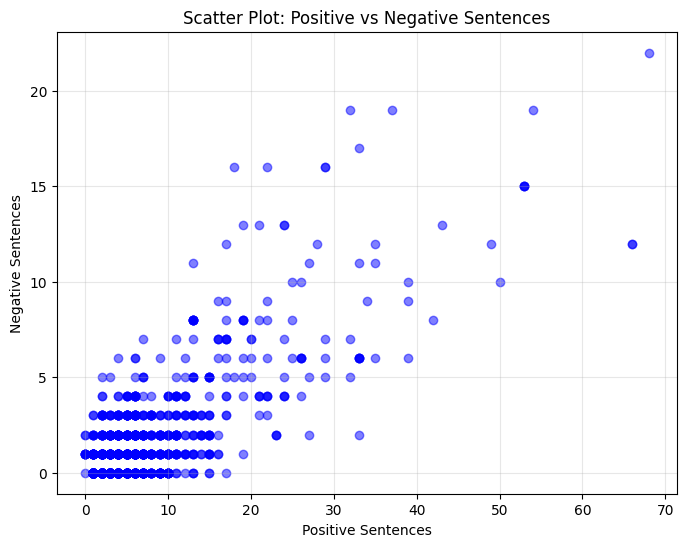

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['positive_sentences'], final_df['negative_sentences'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Positive vs Negative Sentences')
plt.xlabel('Positive Sentences')
plt.ylabel('Negative Sentences')
plt.grid(True, alpha=0.3)
plt.show()


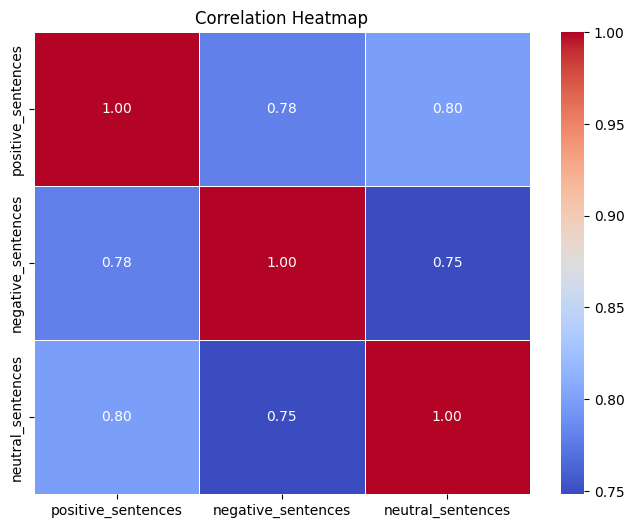

In [32]:
correlation_matrix = final_df[['positive_sentences', 'negative_sentences', 'neutral_sentences']].corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


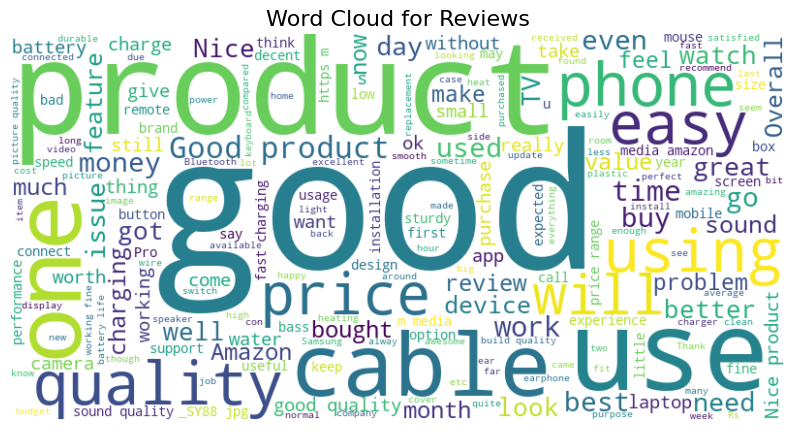

In [33]:
from wordcloud import WordCloud
all_reviews = ' '.join(final_df['review'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue'
).generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews', fontsize=16)
plt.show()


Text(0.5, 1.0, 'Word Cloud for Positive Reviews')

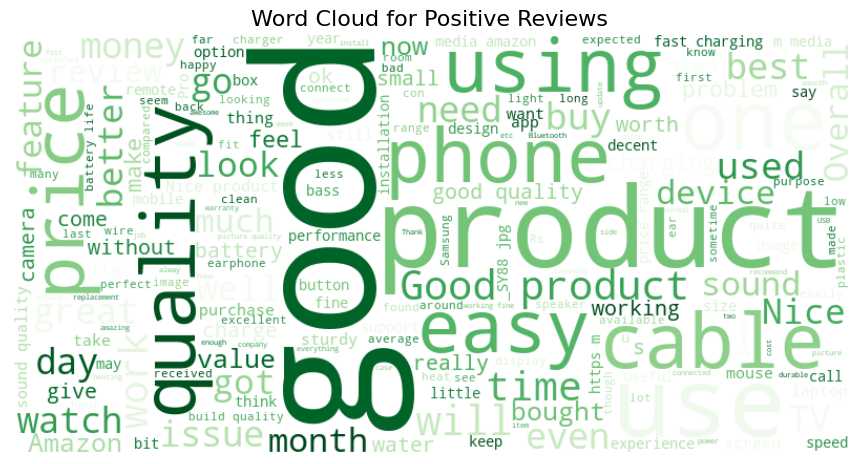

In [34]:
positive_reviews = ' '.join(final_df[final_df['overall_sentiment'] == 'positive']['review'].astype(str))
positive_wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens',
    max_words=200
).generate(positive_reviews)

plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize=16)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
reviews=final_df['review']
sentiment=final_df['overall_sentiment']
tfidf=TfidfVectorizer(max_features=1000)
X=tfidf.fit_transform(reviews).toarray()
print(X.shape)

(1465, 1000)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,sentiment,test_size=0.2,random_state=99)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf=RandomForestClassifier(n_estimators=300,max_depth=20,random_state=99)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("The Accuracy is:",accuracy_score(y_test,y_pred)*100)

The Accuracy is: 94.53924914675767


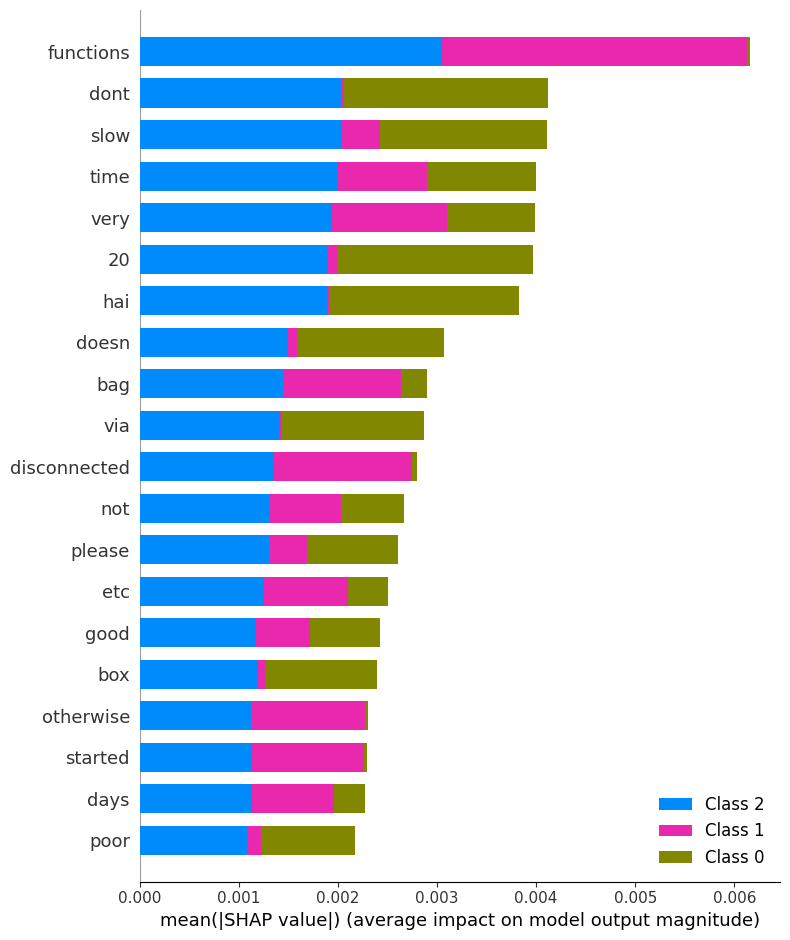

In [44]:
import shap

# Create the SHAP explainer
explainer = shap.Explainer(rf, X_train)  # or use TreeExplainer for RandomForest

# Get SHAP values
shap_values = explainer(X_test[:100])

# Plot SHAP summary
shap.summary_plot(shap_values, X_test[:100], feature_names=tfidf.get_feature_names_out())
